# Task 1: Data Preparation

## 1.1: Importing libraries, loading data and checking the loaded data

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', None)


In [2]:
# Loading the data from the file NBA_players_stats.csv using pandas library.

nbaPlayerStats = pd.read_csv('NBA_players_stats.csv',sep=',', decimal ='.',header =0, index_col=0).round(3)
print(nbaPlayerStats)

                       Player     Pos  Age    Tm   G  GS    MP   FG  FGA  \
Rk                                                                         
1            Precious Achiuwa      PF   21   MIA  35   2   491   84  145   
2                Jaylen Adams      PG   24   MIL   7   0    18    1    8   
3                Steven Adams       C   27   NOP  33  33   918  115  187   
4                 Bam Adebayo       C   23   MIA  33  33  1119  236  419   
5           LaMarcus Aldridge       C   35  SAS   21  18   544  115  248   
6           Ty-Shon Alexander      SG   22   PHO   3   0     8    0    3   
7    Nickeil Alexander-Walker     SG    22   NOP  28   3   495   86  211   
8               Grayson Allen      SG   25   MEM  23  12   551   67  164   
9               Jarrett Allen       C   22   TOT  35  17   977  172  257   
9               Jarrett Allen       C   22  BRK   12   5   320   44   65   
9               Jarrett Allen       C   22   CLE  23  12   657  128  192   
10          

In [3]:
nbaPlayerStats.shape

(512, 28)

## 1.2 Clean the data


### 1.2.1 Handling 'NaN' Values

In [4]:
# Now there are some NaN which are generated for 0/0 or n/0 cases. So, the value of those cells can be zero as well.

# changing na with the value of 0. 

clean_nbaPlayers=nbaPlayerStats.fillna(0)
clean_nbaPlayers.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,0,0,0.000,84,145,0.579,44,81,0.543,46,95,141,20,15,19,32,58,212
2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.000,1,6,0.167,0,0,0.000,0,3,3,2,0,0,0,1,20000
3,Steven Adams,C,27,NOP,33,33,918,115,187,0.615,0,1,0.000,115,186,0.618,35,79,0.443,133,161,294,69,29,20,50,63,265
4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563,2,6,0.050,234,413,0.567,160,189,0.847,72,241,313,179,29,34,98,80,634
5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75,0.360,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,28800
6,Ty-Shon Alexander,SG,22,PHO,3,0,8,0,3,0.000,0,1,0.000,0,2,0.000,0,0,0.000,0,1,1,1,0,0,0,1,0
7,Nickeil Alexander-Walker,SG,22,NOP,28,3,495,86,211,0.408,30,98,0.306,56,113,0.496,28,35,0.800,5,61,66,54,28,9,32,44,230
8,Grayson Allen,SG,25,MEM,23,12,551,67,164,0.409,46,113,0.407,21,51,0.412,34,38,0.895,8,57,65,50,23,3,21,30,214
9,Jarrett Allen,C,22,TOT,35,17,977,172,257,0.669,4,8,0.050,168,249,0.675,123,166,0.741,111,235,346,60,16,59,54,55,471


### 1.2.2 Cleaning the Name Column

In [5]:
# Is there any white space in Player column. Ans: No
len(clean_nbaPlayers[clean_nbaPlayers['Player'].str.isspace()])

0

In [6]:
# Are all player's name in title format? No
clean_nbaPlayers[clean_nbaPlayers['Player'].str.istitle() ==False]['Player']

Rk
5       LaMarcus Aldridge
17             OG Anunoby
24      Marvin Bagley III
25            LaMelo Ball
30             RJ Barrett
40        DeAndre' Bembry
103      DeMarcus Cousins
113         DeMar DeRozan
117      Donte DiVincenzo
123             PJ Dozier
130             CJ Elleby
170        JaMychal Green
228          LeBron James
229       DaQuan Jeffries
243        DeAndre Jordan
258           Zach LaVine
266          Caris LeVert
289       Frank Mason III
295         Patrick McCaw
296           CJ McCollum
297        T.J. McConnell
298       Jaden McDaniels
299       Jalen McDaniels
300        Doug McDermott
301        Sean McDermott
302          JaVale McGee
303       Rodney McGruder
304      Alfonzo McKinnie
305     Jordan McLaughlin
306          Ben McLemore
350             KZ Okpala
382       Jahmi'us Ramsey
394    Glenn Robinson III
406        JaKarr Sampson
452         Fred VanVleet
Name: Player, dtype: object

In [7]:
# Converting all from varius formats to title format
clean_nbaPlayers['Player']=clean_nbaPlayers['Player'].str.title()


In [8]:
# Checking again, whether all are title or not. All 512 Names are in title.
len(clean_nbaPlayers[clean_nbaPlayers['Player'].str.istitle()])

512

In [9]:
# Cleaning '.- from the data
clean1=clean_nbaPlayers['Player'].str.replace("'", "")
clean2=clean1.str.replace(".", "")
clean3=clean2.str.replace("-", " ")
clean4=clean3.str.replace("ć", "c")
clean5=clean4.str.replace("ó", "o")
clean6=clean5.str.replace("é", "e")
clean7=clean6.str.replace("ž", "z")
clean8=clean7.str.replace("ö", "o")
clean9=clean8.str.replace("á", "a")
clean10=clean9.str.replace("š", "s")
clean11=clean10.str.replace("ý", "y")
clean12=clean11.str.replace("č", "c")
clean13=clean12.str.replace("Š", "S")
clean14=clean13.str.replace("ģ", "g")
clean15=clean14.str.replace("ò", "o")
clean16=clean15.str.replace("í", "i")
clean17=clean16.str.replace("Č", "C")


In [10]:
clean_nbaPlayers['Player']=clean17
clean_nbaPlayers.head(11)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,0.579,0,0,0.000,84,145,0.579,44,81,0.543,46,95,141,20,15,19,32,58,212
2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.000,1,6,0.167,0,0,0.000,0,3,3,2,0,0,0,1,20000
3,Steven Adams,C,27,NOP,33,33,918,115,187,0.615,0,1,0.000,115,186,0.618,35,79,0.443,133,161,294,69,29,20,50,63,265
4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,0.563,2,6,0.050,234,413,0.567,160,189,0.847,72,241,313,179,29,34,98,80,634
5,Lamarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75,0.360,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,28800
6,Ty Shon Alexander,SG,22,PHO,3,0,8,0,3,0.000,0,1,0.000,0,2,0.000,0,0,0.000,0,1,1,1,0,0,0,1,0
7,Nickeil Alexander Walker,SG,22,NOP,28,3,495,86,211,0.408,30,98,0.306,56,113,0.496,28,35,0.800,5,61,66,54,28,9,32,44,230
8,Grayson Allen,SG,25,MEM,23,12,551,67,164,0.409,46,113,0.407,21,51,0.412,34,38,0.895,8,57,65,50,23,3,21,30,214
9,Jarrett Allen,C,22,TOT,35,17,977,172,257,0.669,4,8,0.050,168,249,0.675,123,166,0.741,111,235,346,60,16,59,54,55,471


### 1.2.3 Sanity Check On 'Age' Column

In [11]:
# Searching errors in Age variable:
clean_nbaPlayers['Age'].value_counts()

 22     54
 23     52
 25     48
 24     43
 27     41
 21     40
 26     38
 28     37
 20     27
 30     25
 29     23
 32     21
 31     19
 19     12
 34     11
 33      7
 35      7
 36      4
 280     1
 37      1
-19      1
Name: Age, dtype: int64

In [12]:
# So, two values are impossible. 280 and -19 . 
# it is unlikely that Players age can be more than 50. 
# So the impossible values are replaced by logical replacements. 19 for -19, 28 for 280 

clean_nbaPlayers.loc[clean_nbaPlayers.Age.isin([-19]),'Age']= 19
clean_nbaPlayers.loc[clean_nbaPlayers.Age.isin([280]),'Age']= 28
clean_nbaPlayers['Age'].value_counts()


22    54
23    52
25    48
24    43
27    41
21    40
28    38
26    38
20    27
30    25
29    23
32    21
31    19
19    13
34    11
33     7
35     7
36     4
37     1
Name: Age, dtype: int64

### 1.2.4 Dealing With Abonormal Values of 'Pos' Feature 

In [13]:
# ROVING WHITE-SPACE AND CONVERTING TO UPPER CASE
positionList=['PF', 'PG', 'C', 'SG', 'SF', 'PG-SG', 'SF-PF'] # allowable positions
clean_nbaPlayers['Pos']=pd.Series(clean_nbaPlayers['Pos'].str.strip())
clean_nbaPlayers['Pos']=pd.Series(clean_nbaPlayers['Pos'].str.upper())


In [14]:
[i for i in clean_nbaPlayers['Pos'].unique() if i not in positionList] # Checking any position out of the list

['SGA', 'SF.', 'PFA']

In [15]:
clean_nbaPlayers.loc[clean_nbaPlayers.Pos.isin(['SGA']),'Pos']='SG'
clean_nbaPlayers.loc[clean_nbaPlayers.Pos.isin(['SF.']),'Pos']='SF'
clean_nbaPlayers.loc[clean_nbaPlayers.Pos.isin(['PFA']),'Pos']='PF'

In [16]:
[i for i in clean_nbaPlayers['Pos'].unique() if i not in positionList] # Checking again any position out of the list

[]

### 1.2.5 Dealing with Abonormal Values of 'Tm' Feature 

In [17]:

team_list=['MIA', 'MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT', 'BRK',
'CLE', 'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'LAC',
'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BOS', 'HOU']
print(team_list)

['MIA', 'MIL', 'NOP', 'SAS', 'PHO', 'MEM', 'TOT', 'BRK', 'CLE', 'ORL', 'LAL', 'POR', 'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'PHI', 'BOS', 'HOU']


In [18]:
# Finding out wrong team names
[ateam for ateam in clean_nbaPlayers['Tm'].unique() if ateam not in team_list]

['SAS ',
 ' PHO',
 ' TOT',
 'BRK ',
 'OKC ',
 ' NOP',
 ' PHI',
 'DET ',
 ' BRK',
 ' IND',
 'MIL ',
 ' SAS',
 'ORL ',
 ' ORL',
 'CLE ',
 'H0U',
 'NyK',
 ' MEM',
 'MIA ',
 ' WAS',
 'IND ',
 ' BOS',
 'GSW ',
 'MEM ']

In [19]:
# Cleaning white-space in'Tm' variable, Confirming team names are in upper case; Correcting a wrong value H0U
clean_nbaPlayers['Tm']=pd.Series(clean_nbaPlayers['Tm'].str.strip())
clean_nbaPlayers['Tm']=pd.Series(clean_nbaPlayers['Tm'].str.upper())
clean_nbaPlayers.loc[clean_nbaPlayers.Tm.isin(['H0U']),'Tm']='HOU'


In [20]:
# Checking any team that is not in the list
[i for i in clean_nbaPlayers['Tm'].unique() if i not in team_list]

[]

### 1.2.6 Checking the Presence of Duplicate Values in the Data

In [21]:
# Checking the presence of any duplicate rows. No duplicate values in the data 
clean_nbaPlayers[clean_nbaPlayers.duplicated()]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### 1.2.7 Investigating 'G' Column for Values<0 or >82

In [22]:
# Sanity test on 'G'(games) variable:
abnormal_noOfGame=(clean_nbaPlayers['G']<0) | (nbaPlayerStats['G']>82)
len(clean_nbaPlayers[abnormal_noOfGame])==0

# All numbers are inbetween 0 to 82. So no abnormal data

True

### 1.2.8 Confirming numeric columns only hold numeric data

In [23]:
# Is there any string or whitespace in the data of numeric columns? Let us check.
numeric_data=clean_nbaPlayers[clean_nbaPlayers.columns[4:]] # selecting only numeric columns
numeric_data.shape[1] == numeric_data.select_dtypes(include=np.number).shape[1]


True

### 1.2.9 Condition checking for PTS column

In [24]:
clean_nbaPlayers[clean_nbaPlayers['PTS']>2000]  # Only 2 values are very high. Those are probably typos.

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.00,1,6,0.167,0,0,0.000,0,3,3,2,0,0,0,1,20000
5,Lamarcus Aldridge,C,35,SAS,21,18,544,115,248,0.464,27,75,0.36,88,173,0.509,31,37,0.838,17,77,94,36,8,18,20,36,28800


In [25]:
# Using the compostion revealed in task 2.1, 
# the corrected values of PTS for Rk2 and Rk5 is calculated and placed in the data-set. 
clean_nbaPlayers['PTS'][2]= 3*clean_nbaPlayers['3P'][2]+ 2* clean_nbaPlayers['2P'][2]+clean_nbaPlayers['FT'][2]
clean_nbaPlayers['PTS'][5]= 3*clean_nbaPlayers['3P'][5]+ 2* clean_nbaPlayers['2P'][5]+clean_nbaPlayers['FT'][5]

clean_nbaPlayers['PTS'].head(5)

<ipython-input-25-9f7d95880313>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_nbaPlayers['PTS'][2]= 3*clean_nbaPlayers['3P'][2]+ 2* clean_nbaPlayers['2P'][2]+clean_nbaPlayers['FT'][2]
<ipython-input-25-9f7d95880313>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_nbaPlayers['PTS'][5]= 3*clean_nbaPlayers['3P'][5]+ 2* clean_nbaPlayers['2P'][5]+clean_nbaPlayers['FT'][5]


Rk
1    212
2      2
3    265
4    634
5    288
Name: PTS, dtype: int64

In [26]:
# Creating a CSV file with the cleaned data

clean_nbaPlayers.to_csv('cleaned_NBA_players_stats.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 
Explore the players' total points: Please analyze the composition of the total points of the top five players with the most points.

### 2.1.1 Subsetting clean_nbaPlayers that consists of top 5 point holders with the feature of Player,FT,3P, 2P.

In [27]:
top5player=clean_nbaPlayers.sort_values(['PTS'], ascending=False).iloc[0:5,:]


In [28]:
# the probaable feature that influences the total points
t5_score_table=top5player[['Player','Age','FT','3P','2P','PTS']]
t5_score_table

,Player,Age,FT,3P,2P,PTS
Rk,,,,,,
37,Bradley Beal,27,243,74,294,1053
109,Stephen Curry,32,184,169,174,1039
12,Giannis Antetokounmpo,26,240,39,329,1015
268,Damian Lillard,30,237,146,169,1013
237,Nikola Jokic,25,163,56,323,977


### 2.1.2: Revealing the composition of total points (by cross checking calculated total points with PTS column)

In [29]:
#From business statement, we know that 3P value weighs 3 points, 2p value weighs 2 points and FG value weigh 1 points.
t5_score_table['FT'] *1 +t5_score_table['3P']*3 +t5_score_table['2P']*2

# That is exactly same data for PTS of t5_score_table column.
# So the composition of points are revealed. 
# the composition of total points by 3P,2P, FT is- 3:2:1


Rk
37     1053
109    1039
12     1015
268    1013
237     977
dtype: int64

### 2.1.3 : Percentages of the components(FT,2P,3P) in Total Points (PTS)

In [30]:
t5_score_table['3P Points']=t5_score_table['3P']*3
t5_score_table['2P Points']=t5_score_table['2P']*2
t5_score_table['3P Points %'] = t5_score_table['3P Points'] / t5_score_table['PTS']
t5_score_table['2P Points %'] = t5_score_table['2P Points'] / t5_score_table['PTS']
t5_score_table['FT points %'] = t5_score_table['FT'] / t5_score_table['PTS']
t5_Percent= t5_score_table[['FT points %','3P Points %','2P Points %', 'PTS']].round(2)
t5_Percent

<ipython-input-30-6fd418f3ca28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5_score_table['3P Points']=t5_score_table['3P']*3
<ipython-input-30-6fd418f3ca28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t5_score_table['2P Points']=t5_score_table['2P']*2
<ipython-input-30-6fd418f3ca28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,FT points %,3P Points %,2P Points %,PTS
Rk,,,,
37,0.23,0.21,0.56,1053
109,0.18,0.49,0.33,1039
12,0.24,0.12,0.65,1015
268,0.23,0.43,0.33,1013
237,0.17,0.17,0.66,977


## Task 2.2 
Assuming that the data collector makes an entry error when collecting data, it can be ensured that the error occurred in the 3P, 3PA and 3P% columns, but it is not sure which player's information the error lies on. Please try to explore the error by visualization to identify how many errors there are and try to fix it.


### 2.2.1 : Checking for invalid values in 3P and 3PA columns.

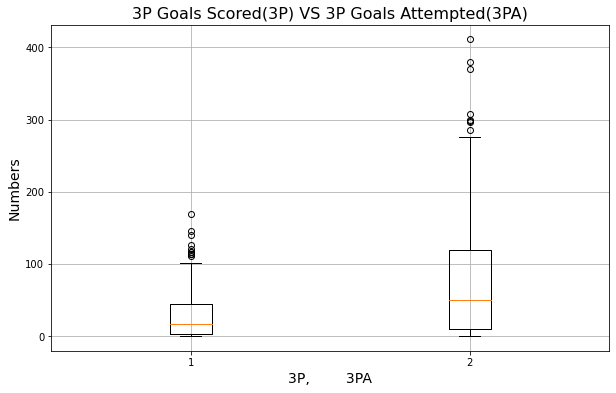

In [31]:
plt.rcParams["figure.figsize"]=10,6
plt.boxplot(clean_nbaPlayers[['3P', '3PA']])
plt.title('3P Goals Scored(3P) VS 3P Goals Attempted(3PA)', fontsize=16)
plt.xlabel('3P,        3PA', fontsize=14)
plt.ylabel('Numbers', fontsize=14)
plt.grid(True)
plt.show()

# This boxplot showing some outliers. Are those impossib;le or invalied values?

### 2.2.2 Checking Outliers:

In [32]:
clean_nbaPlayers[(clean_nbaPlayers['3PA']>270) | (clean_nbaPlayers['3P']>100)][['3P','3PA','3P%','PTS']]
# Close Observation finds that those values are not abnormal.
# Because some players attempt more times to score goals and some one score more goals compared to others.
# So those should remain in data for further analysis.

,3P,3PA,3P%,PTS
Rk,,,,
38,116,286,0.406,677
95,114,308,0.370,646
109,169,411,0.411,1039
182,101,252,0.401,784
188,126,249,0.506,549
199,140,370,0.378,590
258,120,276,0.435,976
268,146,380,0.384,1013
316,113,296,0.382,839


### 2.2.3 Confiming 3P not more than 3PA

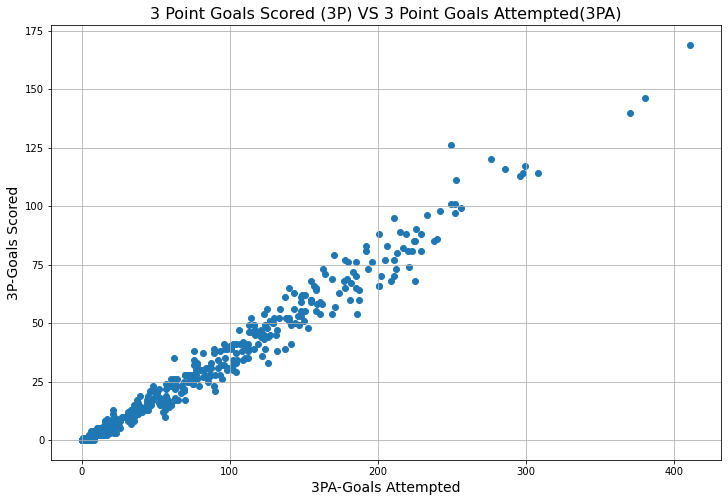

In [33]:
#searching any 3P value getter than 3PA. There is none. So, 3P and 3PA columns have valied data.
plt.rcParams["figure.figsize"]=12,8
plt.scatter(clean_nbaPlayers['3PA'], clean_nbaPlayers['3P'])
plt.title('3 Point Goals Scored (3P) VS 3 Point Goals Attempted(3PA)', fontsize=16)
plt.xlabel('3PA-Goals Attempted', fontsize=14)
plt.ylabel('3P-Goals Scored', fontsize=14)
plt.grid(True)
plt.show()

### 2.2.4: Checking 3P% Column (Comparing actual 3P% value with calculated 3P% values)

In [34]:
check3P =clean_nbaPlayers[['Player','3P','3PA','3P%']]
check3P['3P%_calc']= (check3P['3P'] / check3P['3PA']).round(3)
check3P['3P%_calc']=check3P['3P%_calc'].fillna(0)


<ipython-input-34-78ed91fbf99a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check3P['3P%_calc']= (check3P['3P'] / check3P['3PA']).round(3)
<ipython-input-34-78ed91fbf99a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check3P['3P%_calc']=check3P['3P%_calc'].fillna(0)


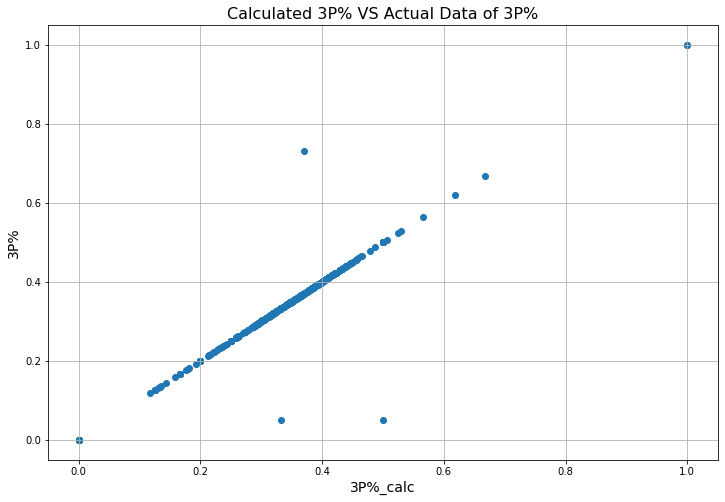

In [35]:
plt.rcParams["figure.figsize"]=12,8
plt.scatter(check3P['3P%_calc'], check3P['3P%'])
plt.title('Calculated 3P% VS Actual Data of 3P%', fontsize=16)
plt.xlabel('3P%_calc', fontsize=14)
plt.ylabel('3P%', fontsize=14)
plt.grid(True)
plt.show()

# The scatter plot clearly shows three abnormal data.Let's find out those.

### 2.2.5 Finding out wrong data

In [36]:
# let us find out which rows have wrong data,
check3P['difference'] = check3P['3P%_calc']-check3P['3P%']
check3P[(check3P['difference']< -.0015) | (check3P['difference']>0.011) ]

# So, rank 4 and rank rank9 column has wrong data as those varies significantly. Those doe not match calculation

<ipython-input-36-c361ebe7e2ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check3P['difference'] = check3P['3P%_calc']-check3P['3P%']


,Player,3P,3PA,3P%,3P%_calc,difference
Rk,,,,,,
4,Bam Adebayo,2,6,0.05,0.333,0.283
9,Jarrett Allen,4,8,0.05,0.500,0.450
24,Marvin Bagley Iii,34,92,0.73,0.370,-0.360


### 2.2.6 Replacing wrong data with calculated correct data

In [37]:
# Changing the wrong values with correct one.
clean_nbaPlayers['3P%'][4]=check3P['3P%_calc'][4]
clean_nbaPlayers['3P%'][9]=check3P['3P%_calc'][9]
clean_nbaPlayers['3P%'][24]=check3P['3P%_calc'][24]
print(clean_nbaPlayers['3P%'].round(2).head(9))


Rk
1    0.00
2    0.00
3    0.00
4    0.33
5    0.36
6    0.00
7    0.31
8    0.41
9    0.50
Name: 3P%, dtype: float64


<ipython-input-37-5bb9d5996edb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_nbaPlayers['3P%'][4]=check3P['3P%_calc'][4]
<ipython-input-37-5bb9d5996edb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_nbaPlayers['3P%'][9]=check3P['3P%_calc'][9]
<ipython-input-37-5bb9d5996edb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_nbaPlayers['3P%'][24]=check3P['3P%_calc'][24]


## Task 2.3 
Please analyze the relationship between the player's total points and the rest features (columns). Please use at least three other columns.


### 2.3.1 Analyzing the relationship between the player's total points and Age


In [38]:
age_pts=clean_nbaPlayers.groupby('Age',as_index=False).mean()
age_pts1=clean_nbaPlayers.groupby('Age',as_index=False).sum()

<AxesSubplot:title={'center':'Average of Total Points by Each Age Band'}, xlabel='Age', ylabel='Average Total Points(Numbers)'>

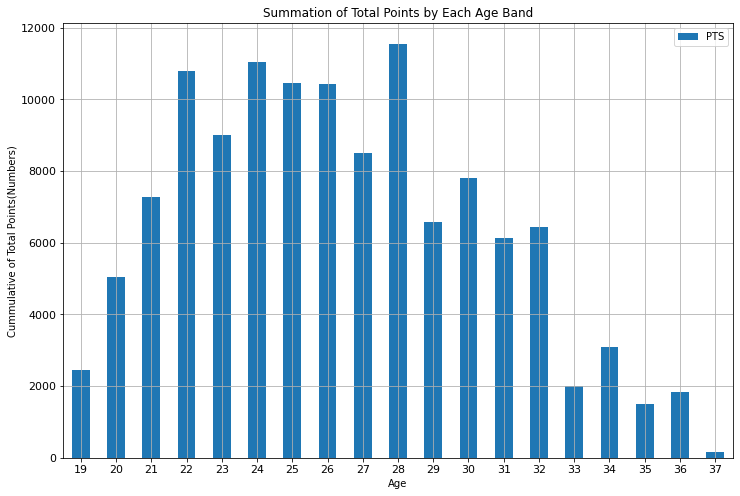

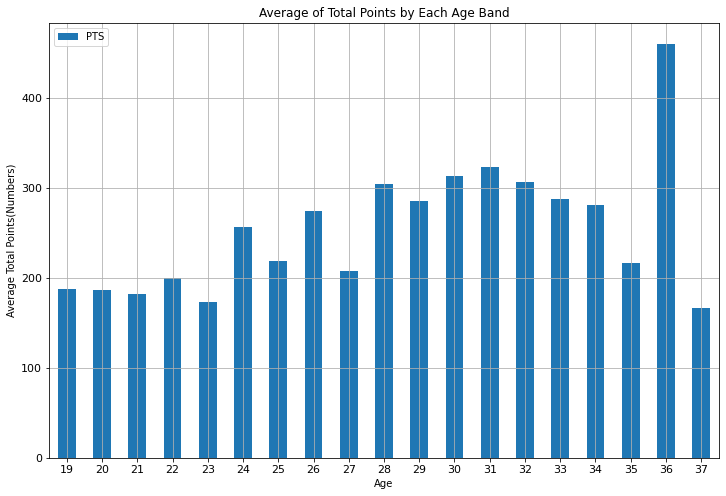

In [39]:
plt.rcParams["figure.figsize"]=12,8
age_pts1.plot.bar(x='Age', y='PTS', rot=0, ylabel='Cummulative of Total Points(Numbers)',\
                 fontsize=11, title="Summation of Total Points by Each Age Band", grid=True)
age_pts.plot.bar(x='Age', y='PTS', rot=0, ylabel='Average Total Points(Numbers)',\
                 fontsize=11, title="Average of Total Points by Each Age Band", grid=True)

### 2.3.2 Analyzing the relationship between the player's total points and minutes played by the player 

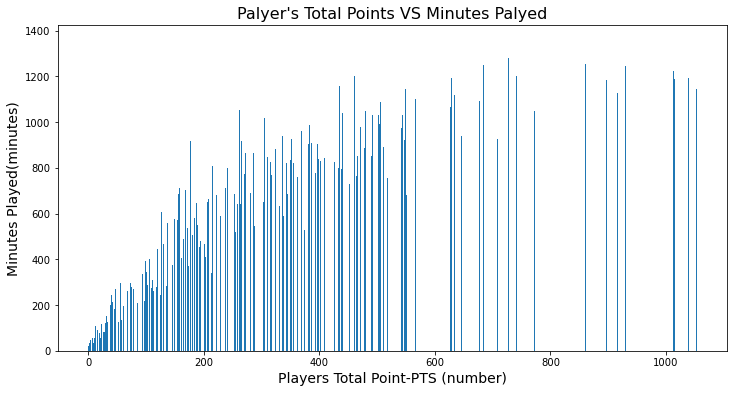

In [40]:
plt.rcParams["figure.figsize"]=12,6
plt.bar(clean_nbaPlayers['PTS'], clean_nbaPlayers['MP'])
plt.title("Palyer's Total Points VS Minutes Palyed", fontsize=16)
plt.xlabel('Players Total Point-PTS (number)', fontsize=14)
plt.ylabel('Minutes Played(minutes)', fontsize=14)
plt.grid(False)
plt.show()

### 2.3.3 Analyzing the relationship between the player's total points and personal fouls/ number of turnovers

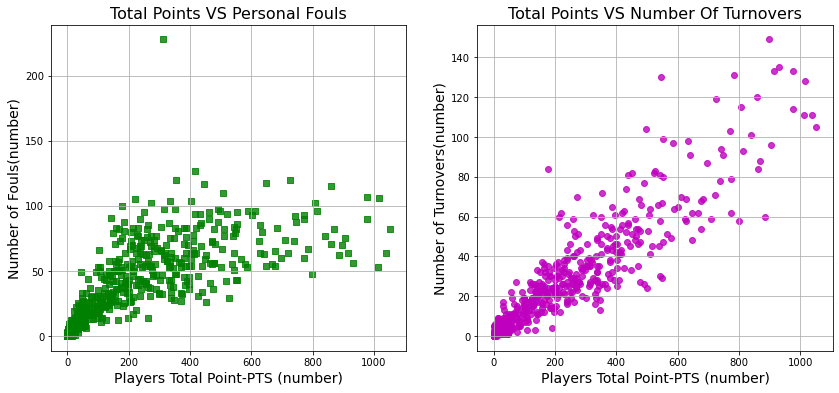

In [41]:
plt.rcParams["figure.figsize"]=14,6
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(clean_nbaPlayers['PTS'], clean_nbaPlayers['PF'],color='g',alpha=0.8,marker="s")
ax1.set_title('Total Points VS Personal Fouls', fontsize=16)
ax1.set_xlabel('Players Total Point-PTS (number)', fontsize=14)
ax1.set_ylabel('Number of Fouls(number)', fontsize=14)
ax1.grid(True)

ax2.scatter(clean_nbaPlayers['PTS'], clean_nbaPlayers['TOV'],color='m',alpha=0.8,marker="o")
ax2.set_title('Total Points VS Number Of Turnovers', fontsize=16)
ax2.set_xlabel('Players Total Point-PTS (number)', fontsize=14)
ax2.set_ylabel('Number of Turnovers(number)', fontsize=14)
ax2.grid(True)

plt.show()

### 2.3.4 Analyzing the relationship between the player's total points and player's position

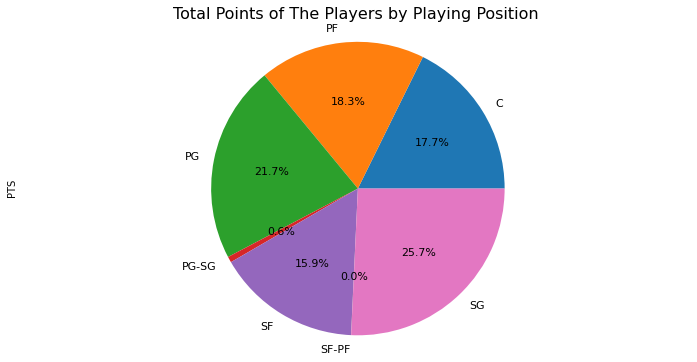

In [42]:
#sums = clean_nbaPlayers.PTS.groupby(clean_nbaPlayers.Pos).sum()
plt.rcParams["figure.figsize"]=12,6
pos_pts=clean_nbaPlayers.PTS.groupby(clean_nbaPlayers.Pos).sum()
pos_pts.plot(kind='pie',autopct='%1.1f%%', fontsize=11 )
plt.title('Total Points of The Players by Playing Position', fontsize=16)
plt.axis('equal');
plt.show()
